In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Clase: Señales periódicas y ejercicios de transformada de Fourier en tiempo discreto (DTFT)</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

### Señales periódicas en el tiempo continuo
> + Es aquella clase de señales que se repiten a sí mismas pasado un cierto período de tiempo.
> + Esta condición de periodicidad es: $x(t) = x(t+T),\,\,\,\forall t$
> + El período $T$ es $2\pi$ dividido por la frecuencia de oscilación.

### Señales periódicas en el tiempo discreto
> + En el caso de de tiempo discreto, una señal periódica se repite a sí misma después de un cierto número $N$ entero. Esta condición de periodicidad es: $x[n]=x[n+N],\,\, \forall n.$
> + El período $N$ satisface: $\omega_{0}N=2\pi k$, donde $k$ es un entero.

In [6]:
# importo módulos y librerías
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# mi creo mis propias funciones
def create_figure_stem(x,y):
    fig = plt.figure(figsize=(18, 5))
    ax = plt.gca()
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
    ax.stem(x,y,'b')
    return

def create_figure_plot(x1,y1,x2,y2):
    fig = plt.figure(figsize=(18, 5))
    ax = plt.gca()
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    ax.plot(x1, y1, 'b'                   , linewidth=4)
    ax.plot(x2, y2, color=[1.0, 0.5, 0.05], linewidth=4)
    
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.legend(['sin(x)', 'cos(x)'])
    
    return

def create_figure_plot_1Hz(x1,y1,x2,y2):
    fig, ax = plt.subplots(figsize=(18,5))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x1, y1, color="blue", linewidth=4.0, linestyle="-")
    # ploteo seno usando color naranjo con línea continua de ancho 1 (pixels)
    ax.plot(x2, y2, color=[1.0, 0.5, 0.05], linewidth=4.0, linestyle="-")
    # defino limites para x
    ax.set_xlim(0.0,1.0)
    # defino ticks para x
    ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['sin (1 Hz)', 'cos (1 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)
    return

def create_figure_plot_10Hz(x1,y1,x2,y2):
    fig, ax = plt.subplots(figsize=(18,5))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x1, y1, color="blue", linewidth=4.0, linestyle="-")
    # ploteo seno usando color naranjo con línea continua de ancho 1 (pixels)
    ax.plot(x2, y2, color=[1.0, 0.5, 0.05], linewidth=4.0, linestyle="-")
    # defino limites para x
    ax.set_xlim(0.0,1.0)
    # defino ticks para x
    ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['sin (10 Hz)', 'cos (10 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)
    return

def create_figure_expcomplex_2Hz(x1,y1,x2,y2):
    fig, ax = plt.subplots(figsize=(18,5))
    # ploteo coseno usando color azul con línea continua de ancho 1 (pixels)
    ax.plot(x1, y1, color="blue", linewidth=4.0, linestyle="-")
    # ploteo seno usando color naranjo con línea continua de ancho 1 (pixels)
    ax.plot(x2, y2, color=[1.0, 0.5, 0.05], linewidth=4.0, linestyle="-")
    # defino limites para x
    ax.set_xlim(0.0,1.0)
    # defino ticks para x
    ax.set_xticks(np.linspace(0.0,1.0,6,endpoint=True))
    # defino limites para y
    ax.set_ylim(-1.2,1.2)
    # Set y ticks
    ax.set_yticks(np.linspace(-1,1,3,endpoint=True))
    
    ax.grid(True, which='both')
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), fontsize = 18)
    plt.setp(ax.get_xmajorticklabels(), fontsize = 18)
   
    plt.title('Funciones periódicas',fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=20)
    plt.ylabel('Amplitud', fontsize=20)
    plt.legend(['sin (10 Hz)', 'cos (10 Hz)'], prop={'size': 18})
    plt.setp(ax.spines.values(), linewidth=3)
    return

### Señales coseno y seno

>> + Son una clase de señales periódicas básicas y muy importantes.
>> + En los siguientes gráficos podemos ver que estas señales son **periódicas**.
>> + Cada repetición completa se denomina **ciclo**.
>> + La duración de cada ciclo se llama **período**. 
>> + La **frecuencia** de una señal es el número de ciclos por segundo, lo cual es el inverso del período. 
>> + Las unidades de frecuencia son ciclos por segundo, o bien, simplemente Hertz, abreviado **Hz**.
>> + Las señales periódicas las podemos descomponer en términos de esta clase de señales: coseno y seno, con diferentes amplitudes y componentes de frecuencias.

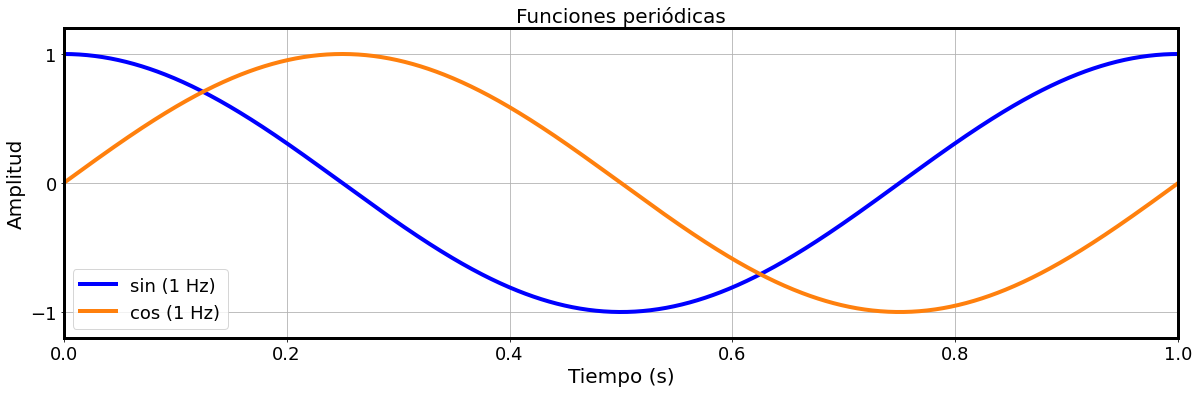

In [9]:
# defino los argumentos:
T   = 1         # período en (segundos)
f   = 1000      # frecuencia (Hz)
N   = T * f     

# defino una variable temporal:
t   = np.linspace(0, T, N)

# defino parámetros de una señal
f   = 1 # frecuencia 1 Hz
A   = 1 # amplitud 

# defino cada función periódica:
x1  = A * np.cos(2*np.pi*f*t)
x2  = A * np.sin(2*np.pi*f*t)

create_figure_plot_1Hz(t,x1,t,x2)

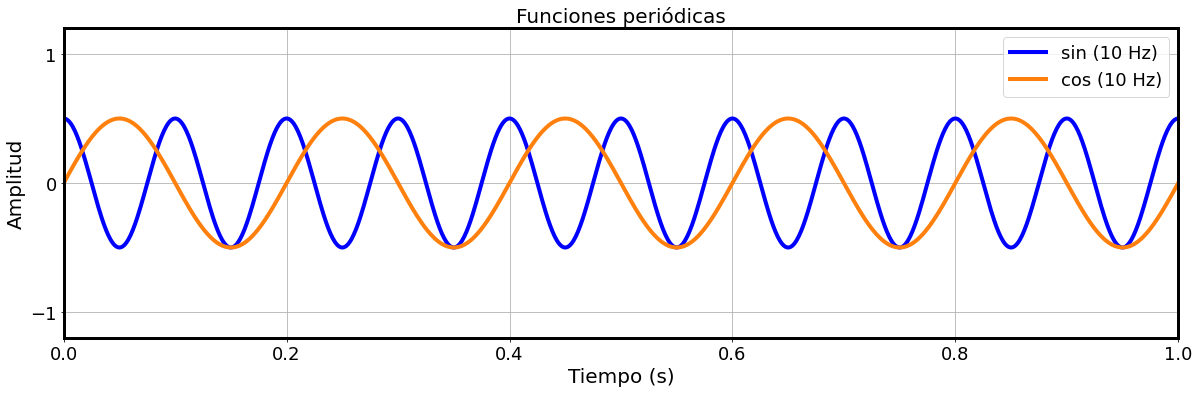

In [13]:
# defino los argumentos:
T   = 1         # período en (segundos)
f   = 1000      # frecuencia en (Hz)
N   = T * f   # duración total en (muestras)

#print(N)

# defino una variable temporal:
t   = np.linspace(0, T, N)

# defino parámetros de una señal
f1  = 10 # frecuencia 10 Hz
A   = 0.5 # amplitud 

f2 = 5 # 5 Hz

# defino cada función periódica:
x3  = A * np.cos(2*np.pi*f1*t)
x4  = A * np.sin(2*np.pi*f2*t)

create_figure_plot_10Hz(t,x3,t,x4)

> + **Asociada con señales coseno y seno, está la señal exponencial compleja:**
>> + Esta es de interés ya que es una representación alternativa poderosa de señales periódicas.
$$
\begin{align*}
z & = {\text{e}}^{\,j\, 2\pi \,{\color{blue}{\bf{f}}} \,t}\\
  & = \underbrace{{\text{cos}}\,(2\pi\, \color{blue}{\bf{f}}\, t)}_{\text{parte real}}+j\,\underbrace{{\text{sin}}\,(2\pi\, \color{blue}{\bf{f}}\, t)}_{\text{parte imaginaria}}
\end{align*}
$$

> + **Módulo y fase de señal exponencial compleja:**
>> + Valor absoluto o magnitud de $z$, también denominado **módulo** de $z$:
$$
\begin{align*}
|z| & = \sqrt{{\text{Re}}^{2}\{z\}\,+\,{\text{Im}}^{2}\{z\}}
\end{align*}
$$
$$
\begin{align*}
\omega&=2\pi f\\
\theta&=\omega\,t
\end{align*}
$$
>> + O bien:
$$
\begin{align*}
|z|&=\sqrt{z\cdot z^{*}}
\end{align*}
$$

In [16]:
# defino los argumentos del proceso de muestreo de tiempo continuo a tiempo discreto:
Ts  = 1         # período de muestreo en (segundos)
fs  = 1000      # frecuencia de muestreo en (Hz)
N   = Ts * fs   # duración total en (muestras)

# defino una variable temporal:
t   = np.linspace(0, Ts, N)

# defino parámetros de una señal
f   = 2 # frecuencia
A   = 1 # amplitud 

# nuestra función exponencial compleja:
z   = A*np.exp(1j*2*np.pi*f*t)

rez = np.real(z)
imz = np.imag(z)

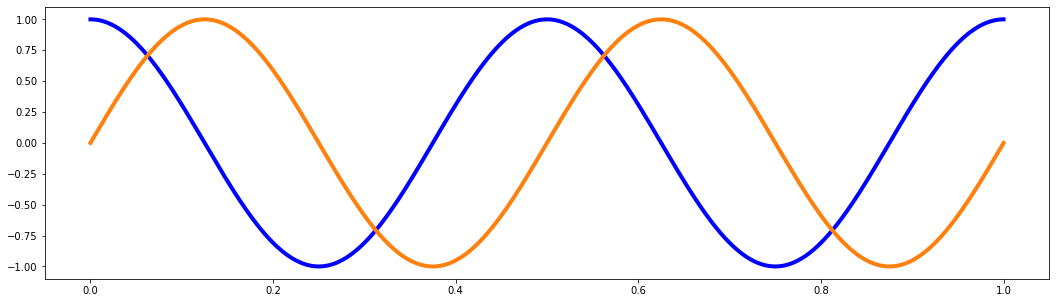

In [17]:
fig, ax = plt.subplots(figsize=(18,5))

ax.plot(t,rex, color="blue", linewidth=4.0, linestyle="-")

ax.plot(t,imx, color=[1.0, 0.5, 0.05], linewidth=4.0, linestyle="-")

### Graficar y calcular la transformada de Fourier:

> + $x[n] = \delta[n]$. Graficar $x[n]$ y $X(e^{j\omega})$.

#### Demostración:

[None, None, None, None, None, None]

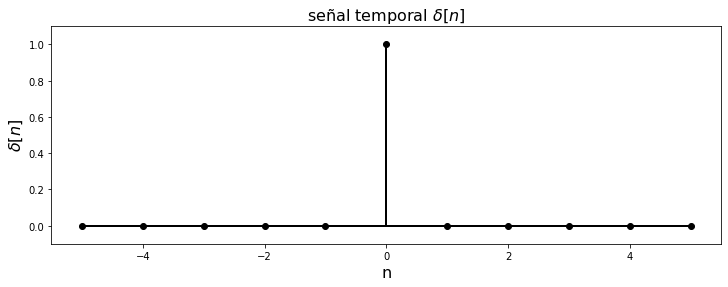

In [41]:
shift = 0
width = 1
pulse = shift + width
ni    = -5
nf    = 6
n     = np.arange(ni,nf)
x     = []
for i in range(len(n)):
    if n[i] < shift:
        value = 0
    if n[i] >= shift and n[i] < pulse:
        value = 1
    if n[i] >= pulse:
        value = 0
    x.append(value)

#print(x)
plt.figure(figsize=(12,4))
baseline = plt.stem(n, x,linefmt='midnightblue', markerfmt='ko', use_line_collection=True)
plt.xlabel('n',fontsize=16)
plt.ylabel('$\delta[n]$',fontsize=16)
plt.title('señal temporal $\delta[n]$',fontsize=16)
plt.ylim(-0.1,1.1)
plt.setp(baseline, color='k',linewidth=2)

In [38]:
y = np.full((10, 10), 1)
print(y)

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


(512,)


[None, None]

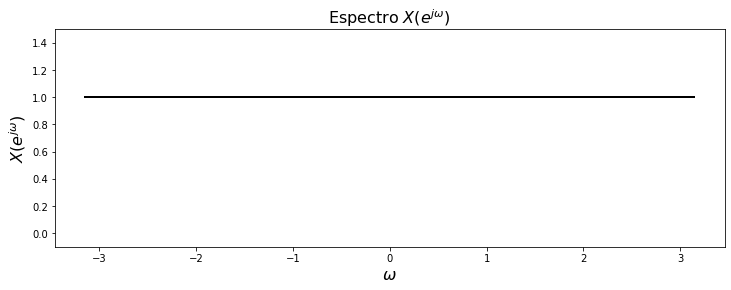

In [40]:
def constant_function(w, amplitude):
    return np.full(w.shape, amplitude)

wi        = -np.pi
wf        = np.pi
amplitude = 1
w         = np.linspace(wi,wf,512)
print(w.shape)
plt.figure(figsize=(12,4))
baseline = plt.plot(w, constant_function(w,amplitude))
plt.xlabel('$\omega$',fontsize=16)
plt.ylabel('$X(e^{j\omega})$',fontsize=16)
plt.title('Espectro $X(e^{j\omega})$',fontsize=16)
plt.ylim(-0.1,1.5)
plt.setp(baseline, color='k',linewidth=2)

### Calcular la transformada de Fourier:

> + Consideremos una secuencia shifteada en el tiempo:
$$
	\begin{align*}
		x[n-n_{0}] 
	\end{align*}
$$
> + Calculemos su transformada de Fourier.

### Demostración: 

> + En efecto, sea $X(e^{j\omega})$ la transformada de Fourier de $x[n].$ Entonces,
$$
    \begin{align*}
		\mathscr{F}\left\{x[n-n_{0}]\right\} &= \sum_{n=-\infty}^{\infty} x[n-n_{0}]\,e^{-j\omega n}\\
	\end{align*}
$$
> + Cambio de variables: Sea $k=n-n_{0}$ tal que:
$$
	 \begin{align*}
		\mathscr{F}\left\{x[n-n_{0}]\right\} &= \sum_{k=-\infty}^{\infty} x[k]\,e^{-j\omega (k+n_{0})}\\
		& = e^{-j\omega n_{0}} \Bigg(  \sum_{k=-\infty}^{\infty} x[k]\,e^{-j\omega k} \Bigg)\\
		& = e^{-j\omega n_{0}}\,X(e^{j\omega})
	\end{align*}
$$
$$
\begin{align}
		x[n-n_{0}] & \overset{\mathscr{F}}{\longleftrightarrow} e^{-j\omega n_{0}}\,X(e^{j\omega})
	\label{Prop1}
	\end{align}
$$

### Calcular la transformada de Fourier

> + Sea $x[n] = a^{n}\,u[n].$ Calculemos la transformada de Fourier de esta señal.

> + Consideremos:
$$	
\begin{align*}
	X(e^{j\omega}) &=\mathscr{F}\left\{x[n]\right\}\\
		 & = \sum_{n=0}^{\infty} a^{n}\,e^{-j\omega n}\\
		 & = \sum_{n=0}^{\infty} \bigg( a\,e^{-j\omega}\bigg)^{n}\\
		 & = \frac{1}{1- a\,e^{-j\omega}},\,\,\,\,\, \text{si} \left| a\,e^{-j\omega}\right|<1, \text{o bien,} \left| a\right|<1
\end{align*}
$$  
> + Observación: Sumabilidad absoluta es una condición suficiente para la existencia de una transformada de Fourier.
> + En Python, evaluar $X(e^{j\omega})$ en 512 puntos espaciados entre $-\pi \leq \omega \leq \pi$ y graficar el espectro de magnitud $|X(e^{j\omega})|$ versus frecuencia; la parte real versus frecuencia; la parte imaginaria versus frecuencia; y la parte real versus la parte imaginaria.


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
a1 = 0.75
a2 = 0.9

w = np.linspace(-np.pi,np.pi,512)

X1 = 1/(1-a1*np.exp(-1j*w))
X2 = 1/(1-a2*np.exp(-1j*w))

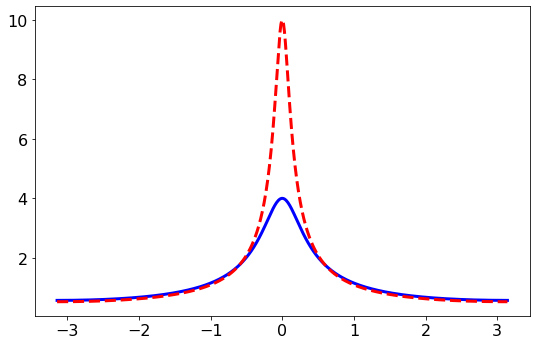

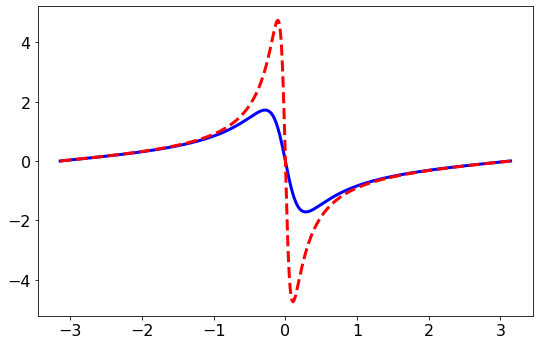

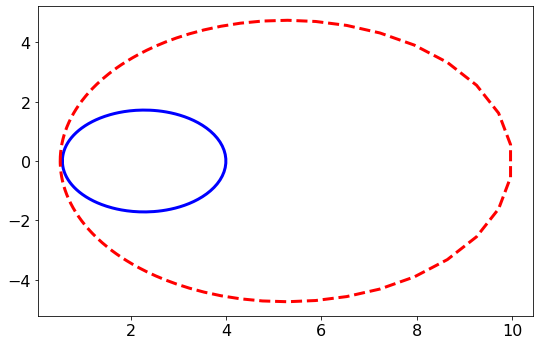

In [4]:
fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(w,np.abs(X1),'b',linewidth = 3.0)
ax.plot(w,np.abs(X2),'r',linestyle='--', linewidth = 3.0)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(w,X1.imag,'b',linewidth = 3.0)
ax.plot(w,X2.imag,'r',linestyle='--', linewidth = 3.0)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(X1.real,X1.imag,'b',linewidth = 3.0)
ax.plot(X2.real,X2.imag,'r',linestyle='--', linewidth = 3.0)

### Teorema de convolución

> + Este teorema es fundamental en procesamiento digital de señales. 
> + Este, establece que la convolución en el dominio del tiempo es equivalente a la multiplicación de los espectros en el dominio de la frecuencia. 
> + Consideremos una secuencia de entrada $x[n]$ a un sistema LTI con respuesta impulso $h[n]$. Entonces, la transformada de Fourier de la salida $y[n]$, se puede obtener al multiplicar el espectro de la entrada $X(e^{j\omega})$ con la función de respuesta de frecuencia del sistema $|H(e^{j\omega})|$.

> + Si 
$$
\begin{align*}
		X(e^{j\omega}) &=\mathscr{F}\left\{x[n]\right\}	
\end{align*}
$$
> + y
$$
    \begin{align*}
		H(e^{j\omega}) &=\mathscr{F}\left\{h[n]\right\}	
	\end{align*}
$$
> + Y si además,
$$
\begin{align*}
		y[n] & = \sum_{k=-\infty}^{\infty} x[k]\,h[n-k] = x[n]*h[n]
\end{align*}
$$
> + Entonces,
$$
\begin{align}
		Y(e^{j\omega}) & = X(e^{j\omega})\cdot H(e^{j\omega})	
\end{align}
$$

### Demostración:

> + En efecto,
$$
\begin{align*}
		Y(e^{j\omega}) & = \sum_{n=-\infty}^{\infty} y[n]\,e^{-j\omega n}\\
		                        & = \sum_{n=-\infty}^{\infty} \Bigg(\sum_{k=-\infty}^{\infty} x[k]\,h[n-k]\Bigg)\,e^{-j\omega n}
\end{align*}
$$
$$
\begin{align}
		Y(e^{j\omega}) & = \sum_{k=-\infty}^{\infty} x[k]\,\Bigg(\sum_{n=-\infty}^{\infty} h[n-k]\,e^{-j\omega n}\Bigg)
	\label{Prop2}
	\end{align}
$$
> + Pero, usando el resultado de la Ec. (1),
$$
\begin{align*}
    \mathscr{F}\left\{h[n-k] \right\} &=  e^{-j\omega k}\,H(e^{j\omega})
\end{align*}
$$
> + Entonces, reemplazamos en la Ec. (\ref{Prop2}), y obtenemos:
$$
\begin{align*}
		Y(e^{j\omega}) & = \sum_{k=-\infty}^{\infty} x[k]\,\Bigg(e^{-j\omega k}\,H(e^{j\omega})\Bigg)\\
	                                 & = \bigg(\sum_{k=-\infty}^{\infty} x[k]\,e^{-j\omega k}\bigg)\,H(e^{j\omega})
\end{align*}
$$    
$$
\begin{align}
		Y(e^{j\omega}) & = X(e^{j\omega})\cdot H(e^{j\omega})
	\label{Prop3}
	\end{align}
$$

### Ilustración de las propiedades de simetría de la transformada de Fourier
> + Algebra usando la relación de Euler con la que podemos expresar la magnitud y la fase del espectro:
$$
\begin{align*}
X(e^{j\omega}) & = \frac{1}{1-a\cdot e^{-j\omega}} \\
& = \frac{1}{1-a\cdot ({\text{cos}}\,\omega - j\,{\text{sin}}\,\omega)}\\
                               & = \frac{1}{1-a\cdot {\text{cos}}\,\omega + j\,a\,{\text{sin}}\,\omega}\,\cdot\,\frac{1-a\cdot {\text{cos}}\,\omega - j\,a\,{\text{sin}}\,\omega}{1-a\cdot {\text{cos}}\,\omega - j\,a\,{\text{sin}}\,\omega}\\
                               & = \frac{1-a\,{\text{cos}}\,\omega}{(1-a\,{\text{cos}}\,\omega)^{2}+a^{2}{\text{sin}}^{2}\,\omega} \,-\, j\,\frac{a\,{\text{sin}\,\omega}}{(1-a\,{\text{cos}}\,\omega)^{2}+a^{2}{\text{sin}}^{2}\,\omega}
\end{align*}
$$

> + Separando las partes Real e Imaginaria:
$$
\begin{align*}
{\text{Real}}\{X\} & = \frac{1-a\,{\text{cos}}\,\omega}{(1-a\,{\text{cos}}\,\omega)^{2}+a^{2}{\text{sin}}^{2}\,\omega}
\end{align*}
$$

$$
\begin{align*}
{\text{Imag}}\{X\} & = -\,\frac{a\,{\text{sin}\,\omega}}{(1-a\,{\text{cos}}\,\omega)^{2}+a^{2}{\text{sin}}^{2}\,\omega}
\end{align*}
$$

> + Espectro de magnitud:
$$
\begin{align*}
\left|X(e^{j\omega})\right|&= \sqrt{X(e^{j\omega})\cdot X^{*}(e^{j\omega})}\\
                           &= \frac{1}{\sqrt{1-2a{\text{cos}\,\omega}+a^{2}}}
\end{align*}
$$

> + Propiedad: La parte real es par:
$$
\begin{align*}
X_{REAL}(e^{j\omega})&=X_{REAL}(e^{-j\omega})
\end{align*}
$$

> + Propiedad: La parte imaginaria es impar:
$$
\begin{align*}
X_{IMAG}(e^{j\omega})&=-X_{IMAG}(e^{-j\omega})
\end{align*}
$$

> + Propiedad: La magnitud es par:
$$
\begin{align*}
\left|X(e^{j\omega})\right| &=\left|X(e^{-j\omega})\right|
\end{align*}
$$

> + Propiedad: La fase es impar:
$$
\begin{align*}
{\large \sphericalangle} X(e^{j\omega}) &=-{\large{\sphericalangle}} X(e^{-j\omega})
\end{align*}
$$

> + Claramente, se puede observar la naturaleza periódica de los espectros de las señales.

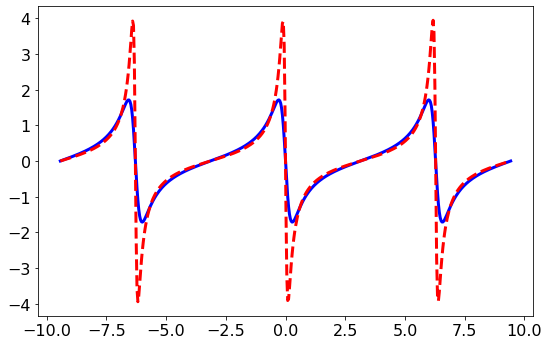

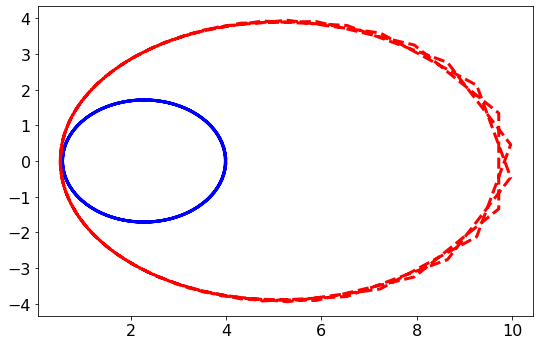

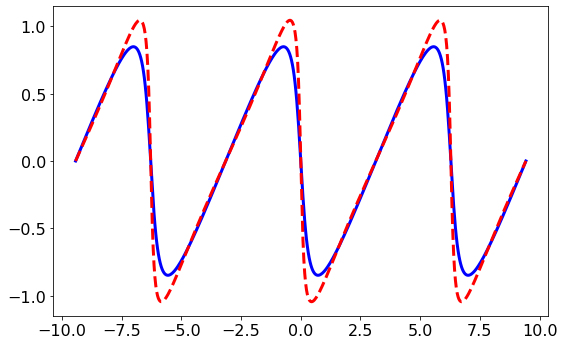

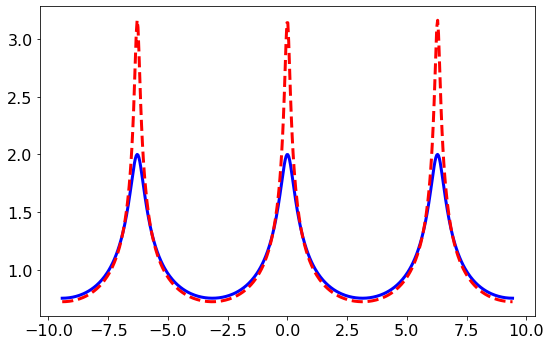

In [5]:
a1 = 0.75
a2 = 0.9
w = np.linspace(-3*np.pi,3*np.pi,512)

realX1 = (1-a1*np.cos(w))/(1-2*a1*np.cos(w)+a1**2)
realX2 = (1-a2*np.cos(w))/(1-2*a2*np.cos(w)+a2**2)

imagX1 = -a1*np.sin(w)/(1-2*a1*np.cos(w)+a1**2)
imagX2 = -a1*np.sin(w)/(1-2*a2*np.cos(w)+a2**2)

magX1  = 1/np.sqrt(1-2*a1*np.cos(w)+a1**2)
magX2  = 1/np.sqrt(1-2*a2*np.cos(w)+a2**2)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(w,imagX1,'b',linewidth = 3.0)
ax.plot(w,imagX2,'r',linestyle='--', linewidth = 3.0)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(realX1,imagX1,'b',linewidth = 3.0)
ax.plot(realX2,imagX2,'r',linestyle='--', linewidth = 3.0)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(w,np.arctan(imagX1/realX1),'b',linewidth = 3.0)
ax.plot(w,np.arctan(imagX2/realX2),'r',linestyle='--', linewidth = 3.0)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(w,np.sqrt(magX1),'b',linewidth = 3.0)
ax.plot(w,np.sqrt(magX2),'r',linestyle='--', linewidth = 3.0)

### Calcular la transformada de Fourier:

> + $x[n] = (\frac{1}{4})^{n}\,u[n]$

> + $x[n] = u[n]-u[n-4]$

> + $x[n] = (\frac{1}{4})^{n+2}\,u[n+2] $
